In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense


mnist = tf.keras.datasets.mnist



In [2]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(features_train, labels_train),(features_test, labels_test) = mnist.load_data()
features_train, features_test = features_train / 255.0, features_test / 255.0

In [4]:
#conv layers
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1),activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))

In [5]:
#fully connected layers
model.add(Flatten())  
model.add(Dense(64,activation='relu'))

model.add(Dense(10,activation='softmax'))


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [8]:
features_train.shape

(60000, 28, 28)

In [9]:
# Reshaping to format which CNN expects (batch, height, width, channels)
features_train = features_train.reshape(60000,28,28,1)
features_test = features_test.reshape(10000,28,28, 1)

In [10]:

model.fit(features_train, labels_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.2452 - accuracy: 0.9243
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0844 - accuracy: 0.9739
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0618 - accuracy: 0.9806
Epoch 4/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0493 - accuracy: 0.9846
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0407 - accuracy: 0.9872
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0345 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0283 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0242 - accuracy: 0.99211s - loss: 0.0239  - ETA: 0s - los
Epoch 9/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0215 - accuracy: 0.9929
Epoch 10/10
1875/1875 [=======

In [ ]:
#inference

In [19]:
test_image=features_test[200]

In [20]:
test_image.shape

(28, 28, 1)

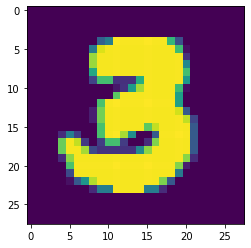

In [21]:
plt.imshow(test_image.reshape(28,28))

In [22]:
test_image = image.img_to_array(test_image)

In [23]:
#predict expects a batch of images...we add a dummy dimension
test_image = test_image.reshape(1,28,28,1)


In [24]:
result = model.predict(test_image)

In [25]:
result

array([[1.3107583e-11, 6.3817174e-09, 1.1816441e-06, 9.9999869e-01,
        9.9717812e-12, 1.6050838e-07, 8.2652206e-13, 1.5696996e-08,
        3.1804625e-08, 5.8581535e-11]], dtype=float32)

In [26]:
result.argmax()

3